In [1]:
import healpy as hpy
import datetime
import os

from ACOSchedule import *
from functions import conversion
from functions import deconversion
from matplotlib import animation
from animation_path import *

start_date="2017/03/09 12:00:00"
end_date = "2017/03/11 12:00:00"

save_list = 0
save_object = 0
save_animation = 0

In [2]:
#Initializing the observer instance
obs=ephem.Observer()
obs.lat="-33:27:00"
obs.lon="-70:40:00"
#-------------------

In [3]:
#Calculating the Healpix discretization
Nside=8
Npix=hpy.pixelfunc.nside2npix(Nside)
ipixmin=int(Npix/2)
ipixmin=0
X=np.transpose(np.array(hpy.pixelfunc.pix2ang(Nside,np.arange(ipixmin,Npix,1))))
X[:,0] = np.pi/2-X[:,0]
#X[:,1] = X[:,1]-np.pi
#X*=180/np.pi
Num=np.size(X,0)
#---------------------------------

In [4]:
#Times since last visit
#T = npr.randint(6, size=Num)+1
if Num == 768:
    T=np.load('Times8_uniform.npy')
elif Num == 1536:
	T=np.load('Times.npy')
elif Num == 6144:
	T=np.load('Times32.npy')
elif Num == 3072:
    T=np.load('Times_complete.npy')
elif Num == 12288:
    T=np.load('Times32_complete.npy')
else:
    print 'Times since last observations created randomly'
    T=npr.randint(1,7,Num)
#-------------------------

In [5]:
ACO=ACOSchedule()
Choose_init = 0
if(Choose_init == 0):
    ACO.initialise(X,obs,start_date,end_date,15,T)
elif(Choose_init == 1):
    ACO.initialise_from_file("videos/2017-6-14_10-5-25_ACO_Save.npy")
elif(Choose_init == 2):
    ACO.initialise_from_file("videos/2017-6-13_15-4-57_ACO_Save.npy")
    ACO.BPS = []
    ACO.IterationNumber = -1
    ACO.AntIterations = 0
    ACO.ChangedIterations = []
    ACO.ParetoHistorial = []

2017-06-28 09:41:25.260713
2017/3/9 23:31:13
2017/3/10 00:17:13
2017/3/10 01:03:13
2017/3/10 01:49:13
2017/3/10 02:35:13
2017/3/10 03:21:12
2017/3/10 04:07:12
2017/3/10 04:53:12
2017/3/10 05:39:12
2017/3/10 06:25:12
2017/3/10 07:11:12
2017/3/10 07:57:12
2017/3/10 08:43:11
2017/3/10 09:29:11
2017/3/10 10:15:11
2017/3/10 23:29:59
2017/3/11 00:16:07
2017/3/11 01:02:15
2017/3/11 01:48:24
2017/3/11 02:34:32
2017/3/11 03:20:40
2017/3/11 04:06:48
2017/3/11 04:52:57
2017/3/11 05:39:05
2017/3/11 06:25:13
2017/3/11 07:11:21
2017/3/11 07:57:29
2017/3/11 08:43:38
2017/3/11 09:29:46
2017/3/11 10:15:54
0.959735136152
Time for parallel : 2.38181114197
0.00555555555556
Construction Complete

2017-06-28 09:41:27.814840


In [6]:
ACO.RunACO_Pheromone(0,2000)
print len(ACO.BPS)

*****************Super Ants******************
*****************Ants******************
0 0 2017-06-28 09:41:27.823265
new non dominated solution 2017-06-28 09:41:28.265169 Obs =  202.463262835 Time =  430.748242541
new non dominated solution 2017-06-28 09:41:28.265819 Obs =  197.904181841 Time =  445.612052375
new non dominated solution 2017-06-28 09:41:28.266331 Obs =  204.208913081 Time =  414.62614252
1 3 2017-06-28 09:41:28.269941
new non dominated solution 2017-06-28 09:41:28.568129 Obs =  195.665830838 Time =  454.931377025
new non dominated solution 2017-06-28 09:41:28.568345 Obs =  206.752790798 Time =  420.511138091
new non dominated solution 2017-06-28 09:41:28.568864 Obs =  203.51478428 Time =  426.417648057
2 5 2017-06-28 09:41:28.571673
new non dominated solution 2017-06-28 09:41:28.857994 Obs =  197.421293078 Time =  446.93439445
new non dominated solution 2017-06-28 09:41:28.858630 Obs =  207.641531951 Time =  408.971757103
3 7 2017-06-28 09:41:28.861234
4 7 2017-06-28 09

125 10 2017-06-28 09:42:04.467004
126 10 2017-06-28 09:42:04.782203
127 10 2017-06-28 09:42:05.109975
128 10 2017-06-28 09:42:05.413277
129 10 2017-06-28 09:42:05.739771
new non dominated solution 2017-06-28 09:42:06.168980 Obs =  211.46772319 Time =  408.09114548
130 11 2017-06-28 09:42:06.175236
131 11 2017-06-28 09:42:06.495979
132 11 2017-06-28 09:42:06.819323
133 11 2017-06-28 09:42:07.080863
new non dominated solution 2017-06-28 09:42:07.328789 Obs =  200.371007232 Time =  456.112070803
134 11 2017-06-28 09:42:07.331576
new non dominated solution 2017-06-28 09:42:07.583569 Obs =  207.457259391 Time =  444.754425802
135 10 2017-06-28 09:42:07.585117
136 10 2017-06-28 09:42:07.834128
137 10 2017-06-28 09:42:08.086648
138 10 2017-06-28 09:42:08.360579
139 10 2017-06-28 09:42:08.661088
140 10 2017-06-28 09:42:08.922862
141 10 2017-06-28 09:42:09.191240
142 10 2017-06-28 09:42:09.482459
143 10 2017-06-28 09:42:09.761293
144 10 2017-06-28 09:42:10.019559
145 10 2017-06-28 09:42:10.3071

332 10 2017-06-28 09:43:37.534520
333 10 2017-06-28 09:43:37.985584
334 10 2017-06-28 09:43:38.446787
335 10 2017-06-28 09:43:38.915838
336 10 2017-06-28 09:43:39.389814
337 10 2017-06-28 09:43:39.838380
338 10 2017-06-28 09:43:40.280642
339 10 2017-06-28 09:43:40.757161
340 10 2017-06-28 09:43:41.216940
341 10 2017-06-28 09:43:41.654591
342 10 2017-06-28 09:43:42.138979
343 10 2017-06-28 09:43:42.619899
344 10 2017-06-28 09:43:43.068129
345 10 2017-06-28 09:43:43.506471
346 10 2017-06-28 09:43:43.955965
347 10 2017-06-28 09:43:44.400074
348 10 2017-06-28 09:43:44.860107
349 10 2017-06-28 09:43:45.295287
350 10 2017-06-28 09:43:45.759317
351 10 2017-06-28 09:43:46.183254
352 10 2017-06-28 09:43:46.646239
new non dominated solution 2017-06-28 09:43:47.094618 Obs =  204.171548559 Time =  453.076065728
353 11 2017-06-28 09:43:47.102292
354 11 2017-06-28 09:43:47.534118
355 11 2017-06-28 09:43:48.011167
356 11 2017-06-28 09:43:48.456391
357 11 2017-06-28 09:43:48.923941
new non dominated s

552 11 2017-06-28 09:45:19.423810
553 11 2017-06-28 09:45:20.118859
554 11 2017-06-28 09:45:20.610160
555 11 2017-06-28 09:45:21.084768
556 11 2017-06-28 09:45:21.541121
557 11 2017-06-28 09:45:22.020691
558 11 2017-06-28 09:45:22.514297
559 11 2017-06-28 09:45:23.004704
560 11 2017-06-28 09:45:23.508307
561 11 2017-06-28 09:45:24.005380
562 11 2017-06-28 09:45:24.456361
563 11 2017-06-28 09:45:24.968398
564 11 2017-06-28 09:45:25.428544
565 11 2017-06-28 09:45:25.903720
566 11 2017-06-28 09:45:26.349644
567 11 2017-06-28 09:45:26.804162
568 11 2017-06-28 09:45:27.270423
569 11 2017-06-28 09:45:27.721497
570 11 2017-06-28 09:45:28.190478
571 11 2017-06-28 09:45:28.666476
572 11 2017-06-28 09:45:29.165161
573 11 2017-06-28 09:45:29.601012
574 11 2017-06-28 09:45:30.071734
new non dominated solution 2017-06-28 09:45:30.622256 Obs =  212.4573913 Time =  422.926822509
575 11 2017-06-28 09:45:30.628812
576 11 2017-06-28 09:45:31.117003
577 11 2017-06-28 09:45:31.641304
578 11 2017-06-28 09:

776 14 2017-06-28 09:47:03.399823
777 14 2017-06-28 09:47:03.744548
778 14 2017-06-28 09:47:04.100722
779 14 2017-06-28 09:47:04.446928
780 14 2017-06-28 09:47:04.826585
781 14 2017-06-28 09:47:05.224434
782 14 2017-06-28 09:47:05.675170
783 14 2017-06-28 09:47:06.159175
784 14 2017-06-28 09:47:06.588666
785 14 2017-06-28 09:47:07.024131
786 14 2017-06-28 09:47:07.399100
787 14 2017-06-28 09:47:07.823396
788 14 2017-06-28 09:47:08.201998
789 14 2017-06-28 09:47:08.601178
790 14 2017-06-28 09:47:08.982483
791 14 2017-06-28 09:47:09.389923
792 14 2017-06-28 09:47:09.825038
793 14 2017-06-28 09:47:10.279494
794 14 2017-06-28 09:47:10.668295
795 14 2017-06-28 09:47:11.059576
796 14 2017-06-28 09:47:11.482365
797 14 2017-06-28 09:47:11.912841
798 14 2017-06-28 09:47:12.365414
799 14 2017-06-28 09:47:12.767129
800 14 2017-06-28 09:47:13.128381
801 14 2017-06-28 09:47:13.495615
802 14 2017-06-28 09:47:13.895464
803 14 2017-06-28 09:47:14.337404
804 14 2017-06-28 09:47:14.709112
805 14 2017-06

995 18 2017-06-28 09:48:33.084064
996 18 2017-06-28 09:48:33.343072
997 18 2017-06-28 09:48:33.616466
998 18 2017-06-28 09:48:33.878936
999 18 2017-06-28 09:48:34.144817
1000 18 2017-06-28 09:48:34.395285
1001 18 2017-06-28 09:48:34.660561
1002 18 2017-06-28 09:48:34.915499
1003 18 2017-06-28 09:48:35.175325
1004 18 2017-06-28 09:48:35.444152
1005 18 2017-06-28 09:48:35.705970
1006 18 2017-06-28 09:48:35.960814
1007 18 2017-06-28 09:48:36.226842
1008 18 2017-06-28 09:48:36.486685
1009 18 2017-06-28 09:48:36.767301
1010 18 2017-06-28 09:48:37.026146
1011 18 2017-06-28 09:48:37.285437
1012 18 2017-06-28 09:48:37.597857
1013 18 2017-06-28 09:48:37.951699
1014 18 2017-06-28 09:48:38.233000
1015 18 2017-06-28 09:48:38.494726
1016 18 2017-06-28 09:48:38.753416
1017 18 2017-06-28 09:48:39.017077
1018 18 2017-06-28 09:48:39.333715
1019 18 2017-06-28 09:48:39.737138
1020 18 2017-06-28 09:48:40.110531
1021 18 2017-06-28 09:48:40.409332
1022 18 2017-06-28 09:48:40.708378
1023 18 2017-06-28 09:48:

1221 21 2017-06-28 09:49:37.865205
1222 21 2017-06-28 09:49:38.124837
1223 21 2017-06-28 09:49:38.375194
1224 21 2017-06-28 09:49:38.631275
1225 21 2017-06-28 09:49:38.898020
1226 21 2017-06-28 09:49:39.166809
1227 21 2017-06-28 09:49:39.429572
1228 21 2017-06-28 09:49:39.696597
1229 21 2017-06-28 09:49:39.961105
1230 21 2017-06-28 09:49:40.233534
1231 21 2017-06-28 09:49:40.496613
1232 21 2017-06-28 09:49:40.759649
1233 21 2017-06-28 09:49:41.005678
1234 21 2017-06-28 09:49:41.267401
1235 21 2017-06-28 09:49:41.583114
1236 21 2017-06-28 09:49:42.019083
1237 21 2017-06-28 09:49:42.386103
1238 21 2017-06-28 09:49:42.712040
1239 21 2017-06-28 09:49:43.035845
1240 21 2017-06-28 09:49:43.559286
1241 21 2017-06-28 09:49:43.841861
1242 21 2017-06-28 09:49:44.230567
1243 21 2017-06-28 09:49:44.560956
1244 21 2017-06-28 09:49:44.877368
1245 21 2017-06-28 09:49:45.295295
1246 21 2017-06-28 09:49:45.615064
1247 21 2017-06-28 09:49:45.921873
1248 21 2017-06-28 09:49:46.344169
1249 21 2017-06-28 0

1444 22 2017-06-28 09:50:40.275385
1445 22 2017-06-28 09:50:40.528921
1446 22 2017-06-28 09:50:40.888488
1447 22 2017-06-28 09:50:41.206173
1448 22 2017-06-28 09:50:41.453246
1449 22 2017-06-28 09:50:41.708822
1450 22 2017-06-28 09:50:41.967372
1451 22 2017-06-28 09:50:42.235946
1452 22 2017-06-28 09:50:42.490514
1453 22 2017-06-28 09:50:42.747125
1454 22 2017-06-28 09:50:42.994799
1455 22 2017-06-28 09:50:43.241918
1456 22 2017-06-28 09:50:43.491043
1457 22 2017-06-28 09:50:43.744473
1458 22 2017-06-28 09:50:44.041052
1459 22 2017-06-28 09:50:44.295976
1460 22 2017-06-28 09:50:44.550103
1461 22 2017-06-28 09:50:44.801104
1462 22 2017-06-28 09:50:45.073691
1463 22 2017-06-28 09:50:45.449265
1464 22 2017-06-28 09:50:45.842034
1465 22 2017-06-28 09:50:46.105231
1466 22 2017-06-28 09:50:46.409780
1467 22 2017-06-28 09:50:46.723114
1468 22 2017-06-28 09:50:46.998902
1469 22 2017-06-28 09:50:47.380194
1470 22 2017-06-28 09:50:47.717177
1471 22 2017-06-28 09:50:47.971542
1472 22 2017-06-28 0

1676 21 2017-06-28 09:51:47.325538
1677 21 2017-06-28 09:51:47.579913
1678 21 2017-06-28 09:51:47.832251
1679 21 2017-06-28 09:51:48.084943
1680 21 2017-06-28 09:51:48.331904
1681 21 2017-06-28 09:51:48.593110
1682 21 2017-06-28 09:51:48.846401
1683 21 2017-06-28 09:51:49.099837
1684 21 2017-06-28 09:51:49.399912
new non dominated solution 2017-06-28 09:51:49.711469 Obs =  213.874429115 Time =  408.006376719
1685 21 2017-06-28 09:51:49.715369
1686 21 2017-06-28 09:51:49.984949
1687 21 2017-06-28 09:51:50.266492
1688 21 2017-06-28 09:51:50.571262
1689 21 2017-06-28 09:51:50.822810
1690 21 2017-06-28 09:51:51.081695
1691 21 2017-06-28 09:51:51.327587
1692 21 2017-06-28 09:51:51.583215
1693 21 2017-06-28 09:51:51.838238
1694 21 2017-06-28 09:51:52.100341
1695 21 2017-06-28 09:51:52.346744
1696 21 2017-06-28 09:51:52.613051
1697 21 2017-06-28 09:51:52.860956
1698 21 2017-06-28 09:51:53.114332
1699 21 2017-06-28 09:51:53.363559
1700 21 2017-06-28 09:51:53.619626
1701 21 2017-06-28 09:51:53.

1902 18 2017-06-28 09:52:46.877866
1903 18 2017-06-28 09:52:47.131993
1904 18 2017-06-28 09:52:47.380148
1905 18 2017-06-28 09:52:47.630316
1906 18 2017-06-28 09:52:47.883347
1907 18 2017-06-28 09:52:48.130113
1908 18 2017-06-28 09:52:48.384934
1909 18 2017-06-28 09:52:48.634988
1910 18 2017-06-28 09:52:48.889547
1911 18 2017-06-28 09:52:49.149879
1912 18 2017-06-28 09:52:49.402215
1913 18 2017-06-28 09:52:49.661276
1914 18 2017-06-28 09:52:49.908781
1915 18 2017-06-28 09:52:50.171171
1916 18 2017-06-28 09:52:50.418290
1917 18 2017-06-28 09:52:50.671636
1918 18 2017-06-28 09:52:50.922616
1919 18 2017-06-28 09:52:51.181340
1920 18 2017-06-28 09:52:51.429613
1921 18 2017-06-28 09:52:51.680572
1922 18 2017-06-28 09:52:51.927911
1923 18 2017-06-28 09:52:52.210394
1924 18 2017-06-28 09:52:52.533221
1925 18 2017-06-28 09:52:52.811147
1926 18 2017-06-28 09:52:53.085084
1927 18 2017-06-28 09:52:53.367244
1928 18 2017-06-28 09:52:53.640160
1929 18 2017-06-28 09:52:53.889252
1930 18 2017-06-28 0

In [7]:
if Nside==32:
    markersize=25
elif Nside==8:
    markersize=400
else:
    markersize=100

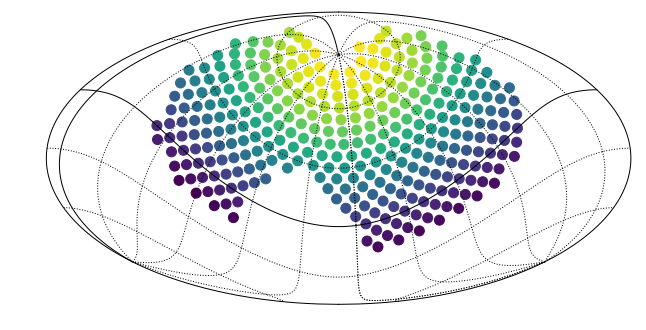

In [8]:
# ACO.X = np.transpose(np.array(hpy.pixelfunc.pix2ang(Nside,np.arange(0,Npix,1))))
# ACO.X[:,0] = np.pi/2-ACO.X[:,0]
hpy.mollview(title="",rot=(-10,-145,0))
hpy.graticule(verbose=0)
ax=hpy.projscatter(np.pi/2-ACO.X[:,0],ACO.X[:,1],lonlat=False,c=np.arange(np.size(ACO.X,0)),marker='.',s=markersize)
plt.show()

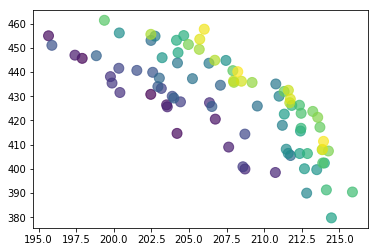

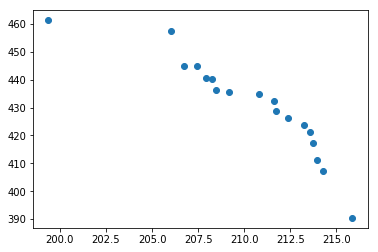

In [9]:
fig=ACO.PlotParetoHistorial(show=True)
fig=ACO.PlotParetoFront(show=True)

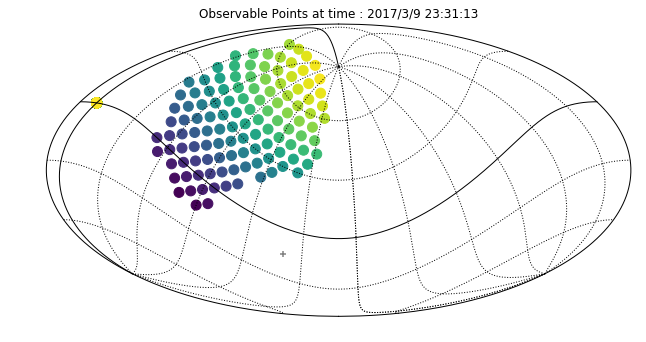

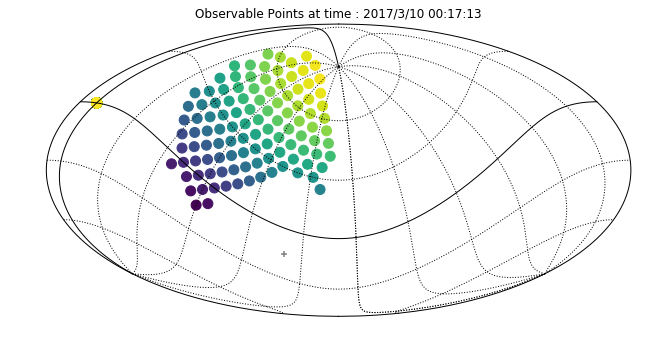

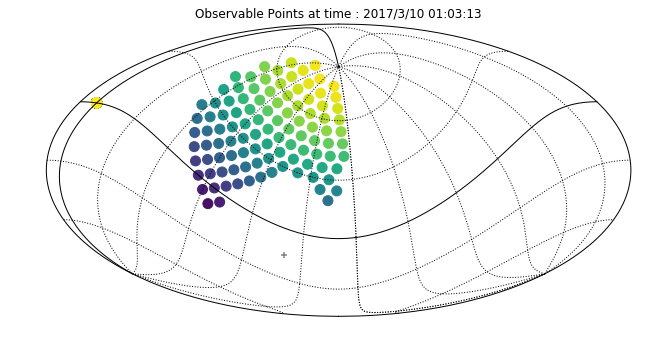

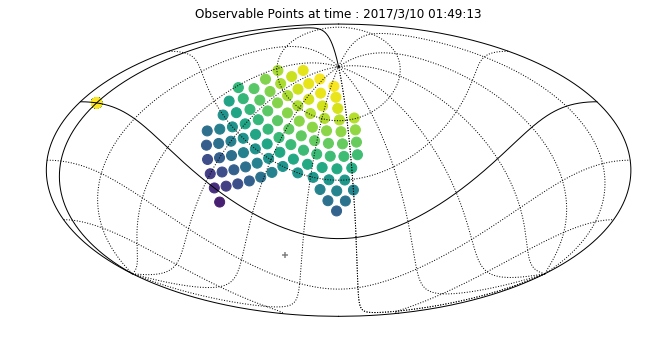

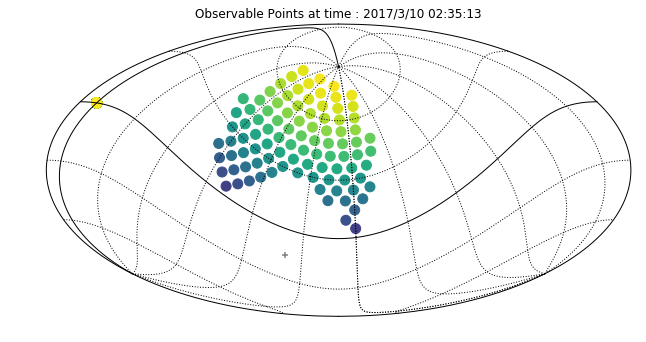

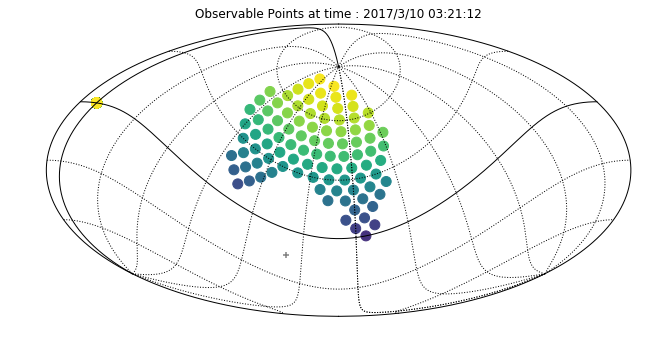

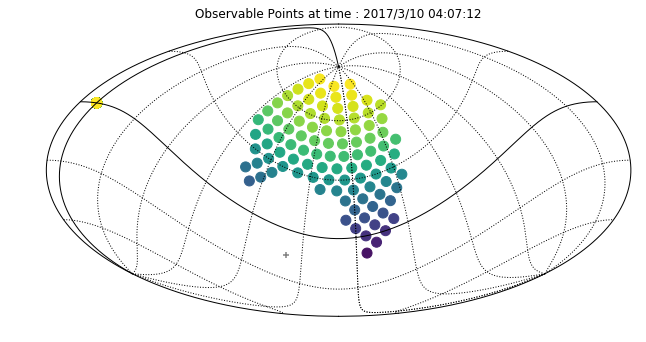

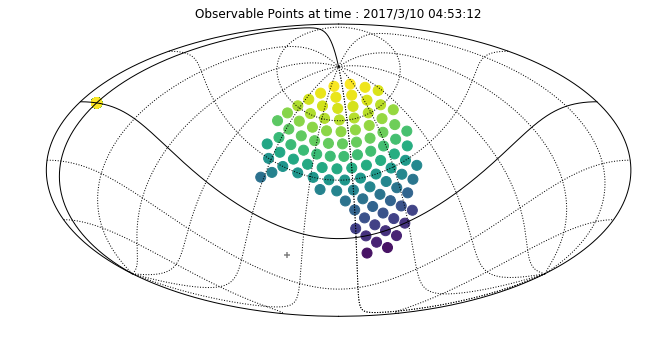

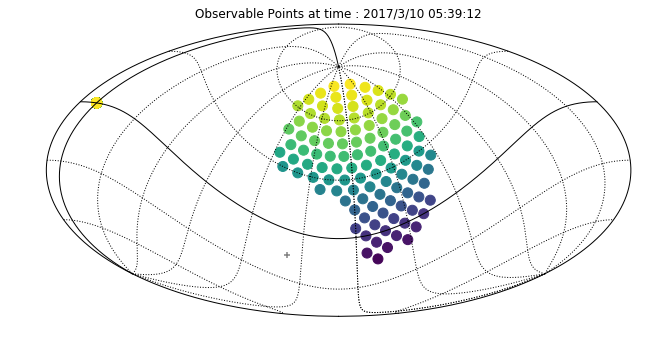

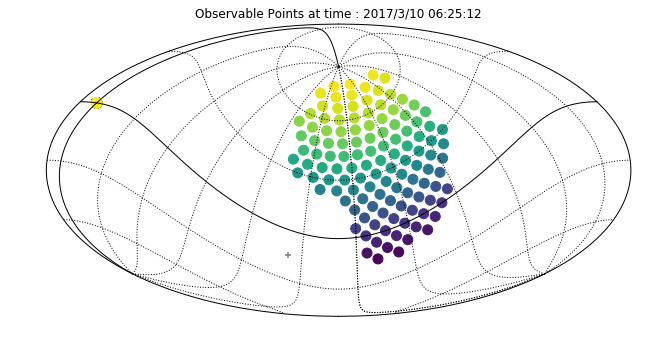

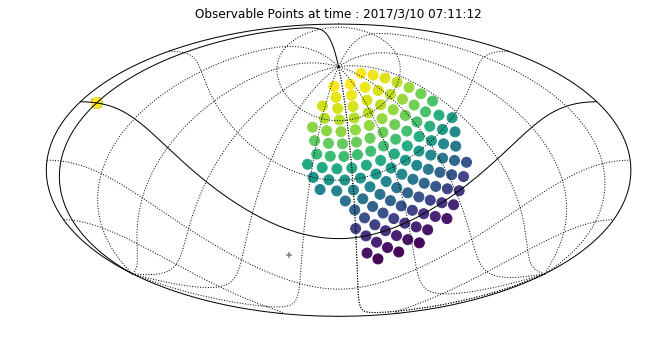

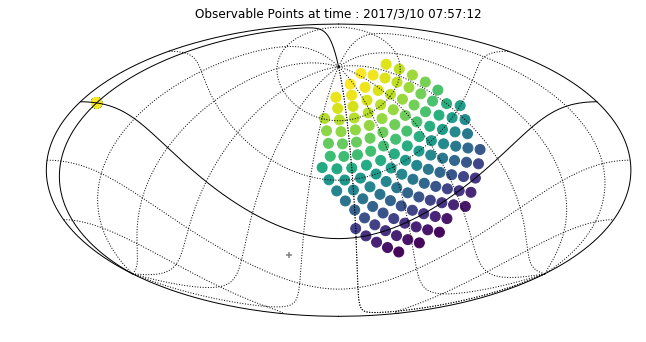

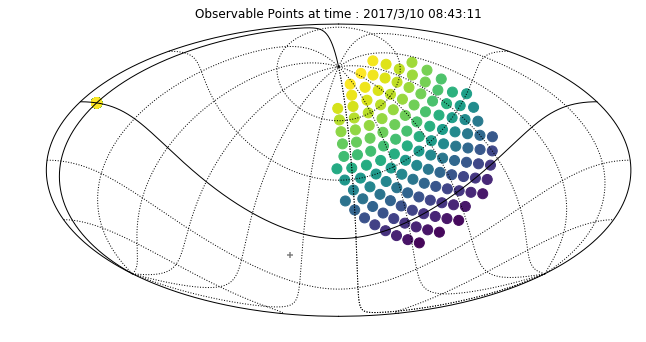

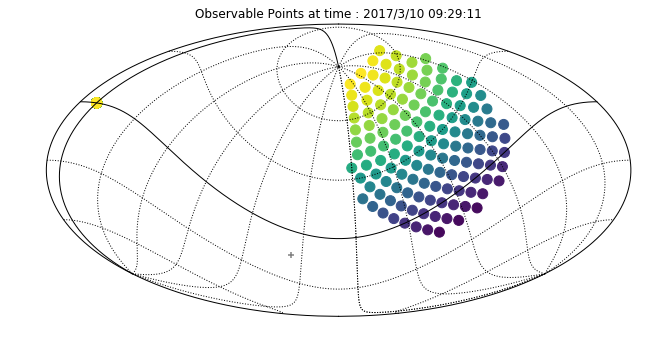

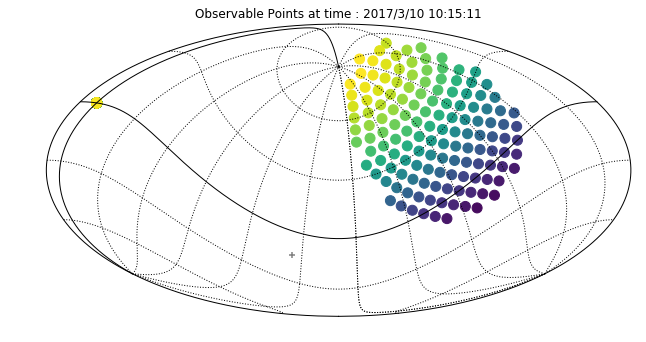

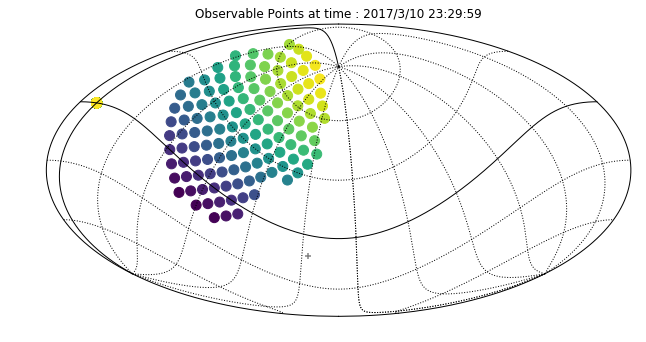

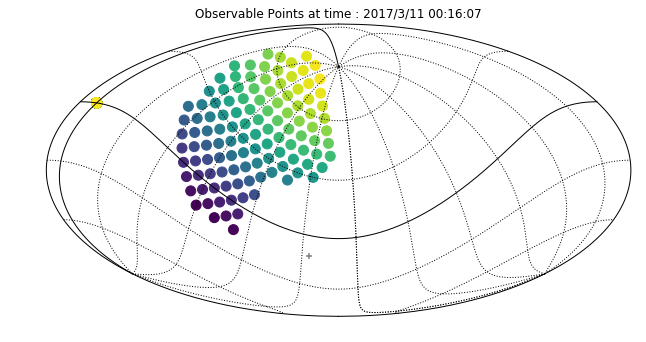

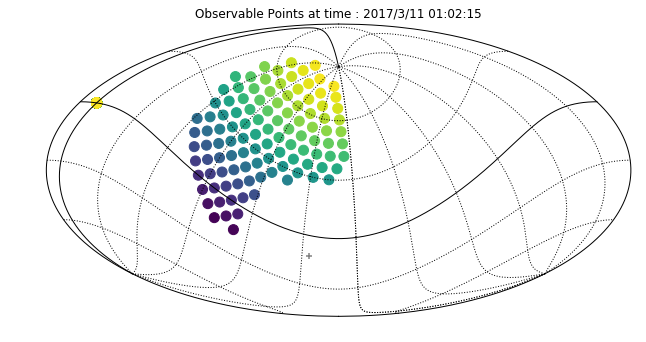

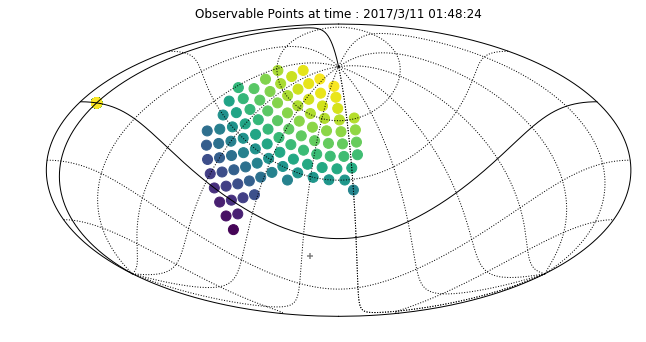

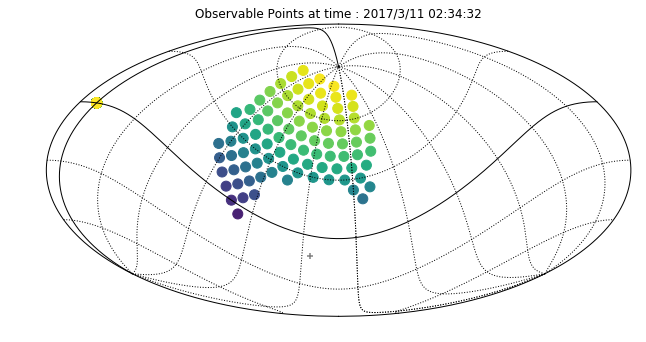

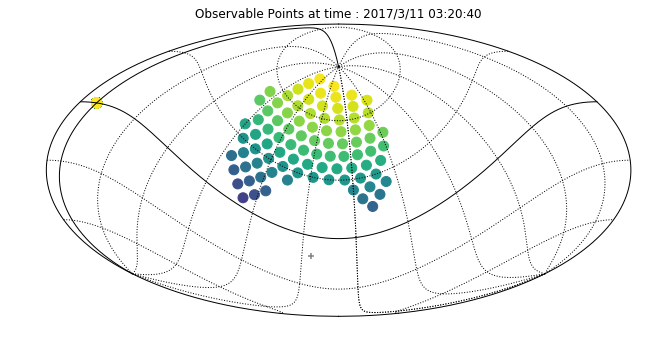

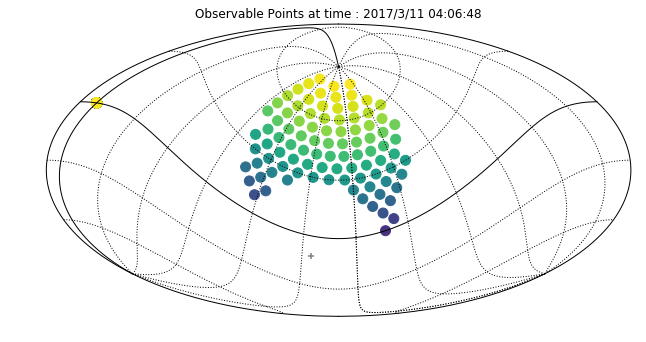

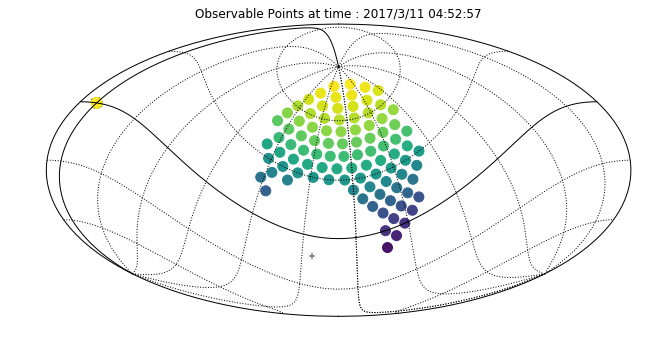

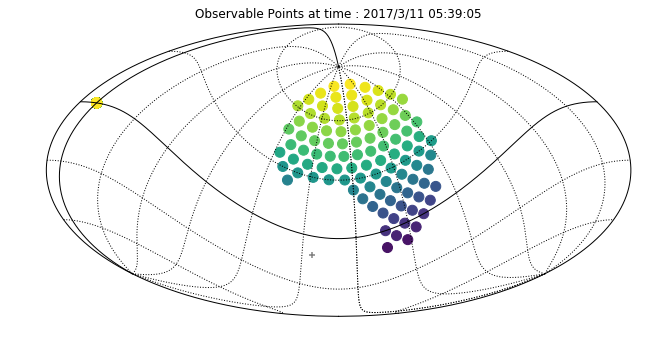

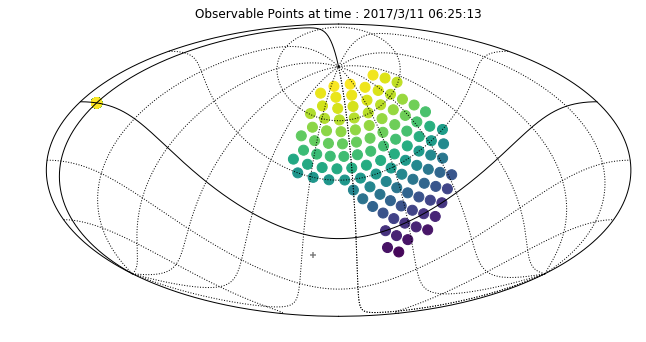

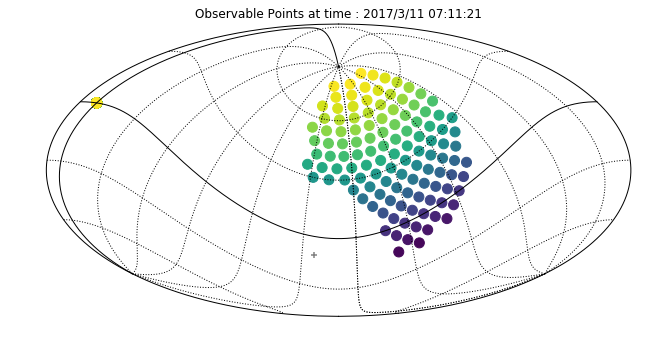

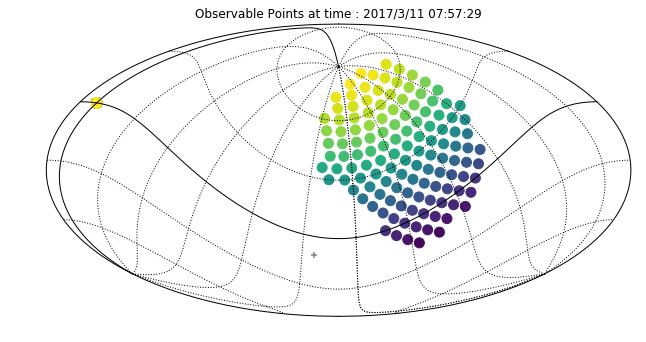

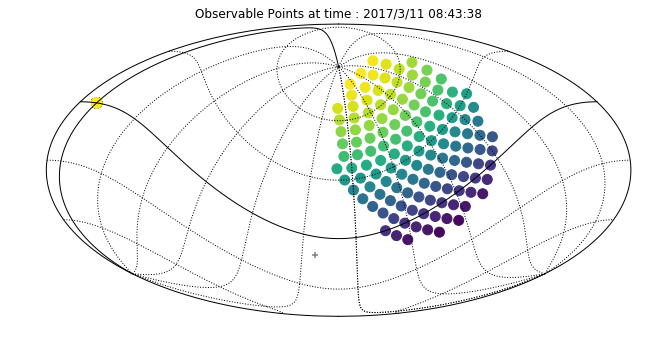

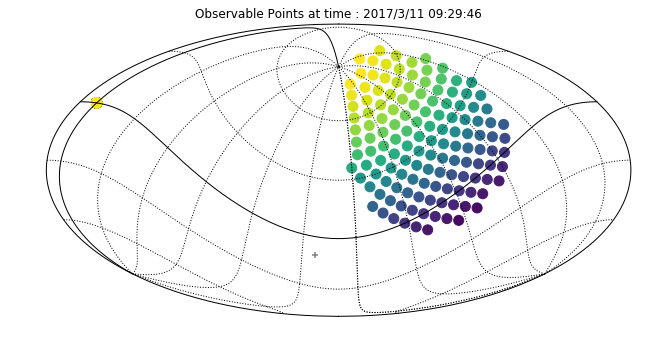

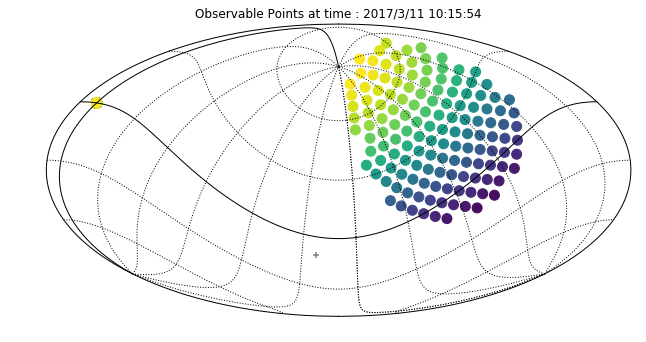

In [10]:
# for i in range(ACO.ND):
for i in range(len(ACO.Fact)):
    ACO.X_fact=np.transpose(np.array([np.multiply(ACO.X[:,0],ACO.Fact[i]),np.multiply(ACO.X[:,1],ACO.Fact[i])]))
    hpy.mollview(title="Observable Points at time : "+str(ephem.Date(ACO.Times[i,0])),rot=(-10,-145,0))
    hpy.graticule(verbose=0)
    ax=hpy.projscatter(np.pi/2-ACO.X_fact[:,0],ACO.X_fact[:,1],lonlat=False,c=np.arange(np.size(ACO.X_fact,0)),marker='.',s=markersize)
    ax=hpy.projscatter(np.pi/2-ACO.MAA[i,1],ACO.MAA[i,0],lonlat=False,marker='+',c='grey')
    plt.show()

In [11]:
ACO.set_time()
timenow = ACO.timenow

In [12]:
def print_list(a):
    print '[',
    for i in a[:-1]:
        print i,',',
    print a[-1],']'


a = np.sort(np.transpose(np.array([int(i[1]*10)/10.0 for i in ACO.BPS])))
b = np.sort(np.transpose(np.array([i[2] for i in ACO.BPS])))[::-1]
print_list(a)
print_list(b)
if(save_list):
    title = "videos/%s-%s-%s_%s-%s-%s_%sIter_Pareto_Values" % (timenow.year,timenow.month,timenow.day,timenow.hour,timenow.minute,timenow.second,ACO.AntIterations)
    np.savetxt("qhflsdjfn.txt",(a,b),fmt='%s',delimiter=',',newline=']\n[',header=' ')
    lines = open("qhflsdjfn.txt").readlines()
    open(title, 'w').writelines(lines[1:-1])
    os.remove("qhflsdjfn.txt")

[ 199.3 , 206.0 , 206.7 , 207.4 , 207.9 , 208.2 , 208.4 , 209.1 , 210.7 , 211.6 , 211.7 , 212.3 , 213.2 , 213.5 , 213.7 , 213.9 , 214.2 , 215.8 ]
[ 461.327431877 , 457.650190544 , 444.829632832 , 444.754425802 , 440.539119126 , 440.104285408 , 436.170899934 , 435.664798432 , 435.040895756 , 432.438410002 , 428.803721125 , 426.263759158 , 423.703660737 , 421.252094756 , 417.178193843 , 411.33974299 , 407.360062308 , 390.427835624 ]


In [13]:
if(save_object):
    ACO.saveACO()

In [14]:
if(save_animation):
    print timenow
    fig = ACO.PlotParetoHistorial(title="%s-%s-%s_%s-%s-%s_%sIter_Pareto_Historial" % (timenow.year,timenow.month,timenow.day,timenow.hour,timenow.minute,timenow.second,ACO.AntIterations))
    fig.savefig("videos/%s-%s-%s_%s-%s-%s_%sIter_Pareto_Historial" % (timenow.year,timenow.month,timenow.day,timenow.hour,timenow.minute,timenow.second,ACO.AntIterations))
    plt.clf()
    fig = ACO.PlotParetoFront(title="%s-%s-%s_%s-%s-%s_%sIter_Pareto_Front" % (timenow.year,timenow.month,timenow.day,timenow.hour,timenow.minute,timenow.second,ACO.AntIterations))
    fig.savefig("videos/%s-%s-%s_%s-%s-%s_%sIter_Pareto_Front" % (timenow.year,timenow.month,timenow.day,timenow.hour,timenow.minute,timenow.second,ACO.AntIterations))
    plt.clf()
    for i in range(len(ACO.BPS)):
        [schedAA,schedDR]=ACO.AZALT(ACO.BPS[i][0])
        print "Saving equatorial for solution "+str(i+1)+"/"+str(len(ACO.BPS))
        animation_path(schedDR,(-10,-145,0),"%s-%s-%s_%s-%s-%s_%sIter_Sol%s_%sObservations_T%s_O%s_equatorial" % (timenow.year,timenow.month,timenow.day,timenow.hour,timenow.minute,timenow.second,ACO.AntIterations,i,np.size(ACO.BPS[i][0],0),ACO.BPS[i][2],int(ACO.BPS[i][1]*10)/10.0),marker='.',s=markersize)
        print "Saving horizontal for solution "+str(i+1)+"/"+str(len(ACO.BPS))
        plt.clf()
        animation_path(schedAA,(0,90,0),"%s-%s-%s_%s-%s-%s_%sIter_Sol%s_%sObservations_T%s_O%s_horizontal" % (timenow.year,timenow.month,timenow.day,timenow.hour,timenow.minute,timenow.second,ACO.AntIterations,i,np.size(ACO.BPS[i][0],0),ACO.BPS[i][2],int(ACO.BPS[i][1]*10)/10.0),marker='.',s=markersize)
        plt.clf()
        plt.close('all')

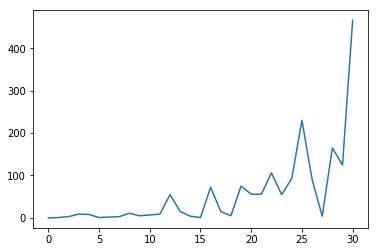

[[   0    1    3    9    8    1    2    3   11    5    7    9   55   15
     4    1   72   15    5   75   56   56  106   55   93  230   91    4
   165  125  466]
 [   0    1    4   13   21   22   24   27   38   43   50   59  114  129
   133  134  206  221  226  301  357  413  519  574  667  897  988  992
  1157 1282 1748]]


In [20]:
if(1):
    ACO.ChangedIterations = np.array(ACO.ChangedIterations)
    V = ACO.ChangedIterations - np.insert(ACO.ChangedIterations,0,0)[:-1]
    plt.figure()
    plt.plot(V)
    plt.show()
#     print np.transpose(np.array([V,ACO.ChangedIterations]))
    print np.array([V,ACO.ChangedIterations])

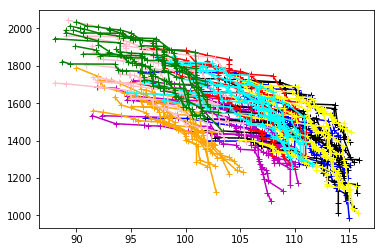

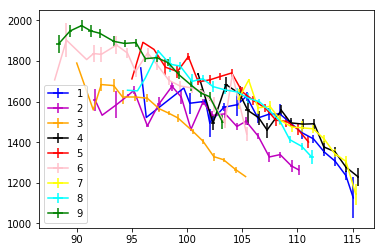

In [21]:
from compare_eta import *
compare_eta()

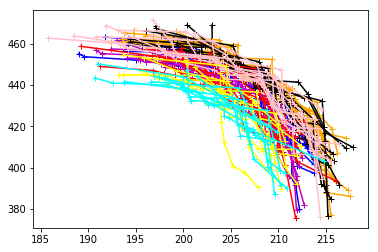

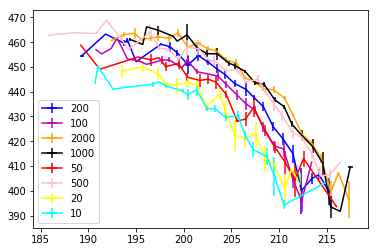

In [17]:
from data_files import *
plot_directory("videos/Change_Iterations")

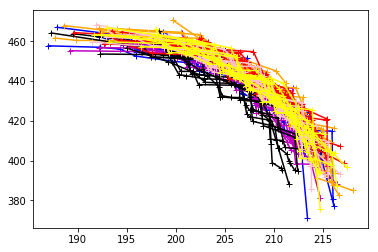

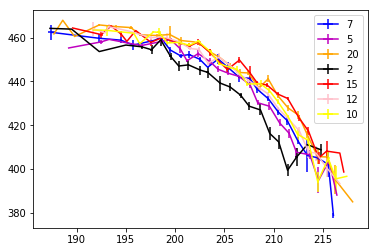

In [18]:
plot_directory("videos/Change_ant_number")

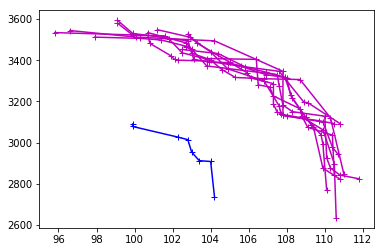

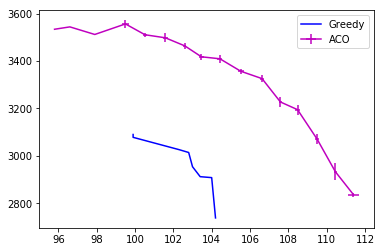

In [19]:
from compare_glouton import *
compare_greedy()